# Training data augmentation (character-level)

In [1]:
! pip install imgaug

In [2]:
import os
import random
import numpy as np
import imageio.v2 as imageio
import imgaug as ia
import imgaug.augmenters as iaa
%matplotlib inline

## Load and show a random image

Random character: Tsadi-medial


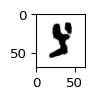

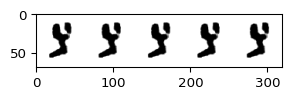

In [111]:
# choose a random directory and file
path = '../data/preprocessed_images/symbols'
random_dir = random.choice(os.listdir(path))
print("Random character:", random_dir)
random_file = random.choice(os.listdir(os.path.join(path, random_dir)))

# read and show image
img = imageio.imread(os.path.join(path, random_dir, random_file))
img_list = [img, img, img, img, img]
ia.imshow(img)
ia.imshow(np.hstack(img_list))

## Rotation + shear

Augmented batch:


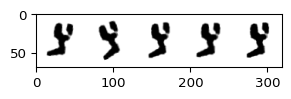

In [112]:
ia.seed(4)

rotate = iaa.Affine(rotate=(-10, 10), shear=(-10, 10), mode='constant', cval=255)

images_aug = rotate(images=img_list)
print("Augmented batch:")
ia.imshow(np.hstack(images_aug))

## Gaussian blur

Augmented batch:


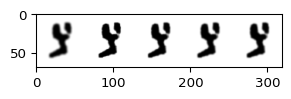

In [113]:
blur = iaa.GaussianBlur(sigma=(0, 3.0))

images_aug = blur(images=img_list)
print("Augmented batch:")
ia.imshow(np.hstack(images_aug))

## Dropout pixels
- note: I think this is not a good augmentation for this task. It is just to show how it works.
- salt and pepper noise would be a better choice

Augmented batch:


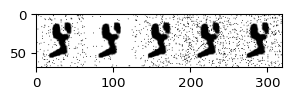

In [114]:
dropout = iaa.Dropout(p=(0, 0.2))

images_aug = dropout(images=img_list)
print("Augmented batch:")
ia.imshow(np.hstack(images_aug))

## Salt and pepper noise
- note: the images are very small, so the grains appear very large

Augmented batch:


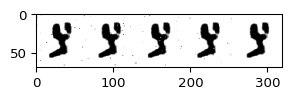

In [115]:
aug = iaa.SaltAndPepper(p=(0, 0.01))

images_aug = aug(images=img_list)
print("Augmented batch:")
ia.imshow(np.hstack(images_aug))

## Salt noise
- maybe use it for the final text image

Augmented batch:


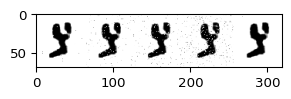

In [116]:
aug = iaa.Salt(p=(0, 0.1))

images_aug = aug(images=img_list)
print("Augmented batch:")
ia.imshow(np.hstack(images_aug))

## Resize (crop and pad to keep the original size)

Augmented batch:


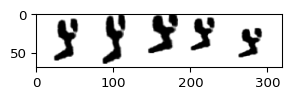

In [117]:
aug = iaa.KeepSizeByResize(iaa.CropAndPad(percent=(-0.2, 0.2), pad_mode='constant', pad_cval=255))

images_aug = aug(images=img_list)
print("Augmented batch:")
ia.imshow(np.hstack(images_aug))

## Elastic transformation

Augmented batch:


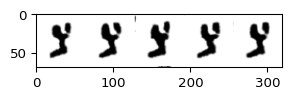

In [118]:
aug = iaa.ElasticTransformation(alpha=(0,20), sigma=(4,6))

# pad the images to avoid black borders after augmentation
pad = iaa.size.Pad(px=1, pad_mode='constant', pad_cval=255)
images_pad = pad(images=img_list)

# elastic transformation
images_aug = aug(images=images_pad)

# crop the images to the original size
crop = iaa.size.Crop(px=1)
images_aug = crop(images=images_aug)

print("Augmented batch:")
ia.imshow(np.hstack(images_aug))

# Let's combine some augmentations

Original batch:


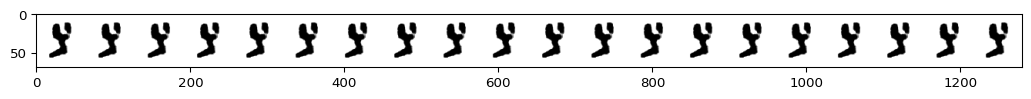

In [119]:
img_list = [img for _ in range(20)]

# show original batch (20 times the same image)
print("Original batch:")
ia.imshow(np.hstack(img_list))

Augmented batch:


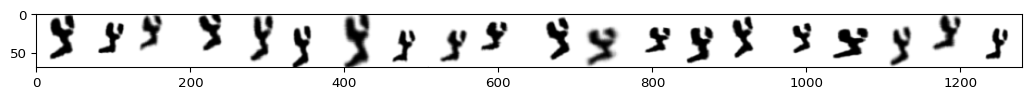

In [121]:
aug = iaa.Sequential([
    iaa.Affine(rotate=(-10, 10), shear=(-10, 10), mode='constant', cval=255),
    iaa.GaussianBlur(sigma=(0, 2.0)),
    iaa.KeepSizeByResize(iaa.CropAndPad(percent=(-0.2, 0.2), pad_mode='constant', pad_cval=255)),
    iaa.Pad(px=2, pad_mode='constant', pad_cval=255),
    iaa.ElasticTransformation(alpha=(0,20), sigma=(4,6)),
    iaa.size.Crop(px=2)
])

images_aug = aug(images=img_list)
print("Augmented batch:")
ia.imshow(np.hstack(images_aug))